In [ ]:
import helpers as h
from os import listdir
from os.path import isfile, join
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

files = ['./test.net']
netlists = ( (f, open(f, 'rb').read().decode('utf-8', 'ignore')) for f in files )

valid_files = [ (f,src) for (f, src) in netlists if h.is_valid_netlist(src)]
graph_data = {}
index = 0
for (f,src) in valid_files:
        # print(f)
        component_list, g = h.netlist_to_graph(src)
        graph_data[index] = (component_list, g)
        index +=1


In [21]:
def _expand(G, explored_nodes, explored_edges):
    """
    Expand existing solution by a process akin to BFS.

    Arguments:
    ----------
    G: networkx.Graph() instance
        full graph

    explored_nodes: set of ints
        nodes visited

    explored_edges: set of 2-tuples
        edges visited

    Returns:
    --------
    solutions: list, where each entry in turns contains two sets corresponding to explored_nodes and explored_edges
        all possible expansions of explored_nodes and explored_edges

    """
    frontier_nodes = list()
    frontier_edges = list()
    for v in explored_nodes:
        for u in nx.neighbors(G,v):
            if not (u in explored_nodes):
                frontier_nodes.append(u)
                frontier_edges.append([(u,v), (v,u)])

    return zip([explored_nodes | frozenset([v]) for v in frontier_nodes], [explored_edges | frozenset(e) for e in frontier_edges])


def find_all_spanning_trees(G):
    """
    Find all spanning trees of a Graph.

    Arguments:
    ----------
    G: networkx.Graph() instance
        full graph

    Returns:
    ST: list of networkx.Graph() instances
        list of all spanning trees

    """
    root = list(G.nodes())[0]
    # initialise solution
    explored_nodes = frozenset([root])
    explored_edges = frozenset([])
    solutions = [(explored_nodes, explored_edges)]
    # we need to expand solutions number_of_nodes-1 times
    for ii in range(G.number_of_nodes()-1):
        # get all new solutions
        solutions = [_expand(G, nodes, edges) for (nodes, edges) in solutions]
        # flatten nested structure and get unique expansions
        solutions = set([item for sublist in solutions for item in sublist])

    return [nx.from_edgelist(edges) for (nodes, edges) in solutions]

{0: {1: {}, 2: {}}, 1: {0: {}, 3: {}}, 2: {0: {}, 5: {}}, 3: {1: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {2: {}, 4: {}}}


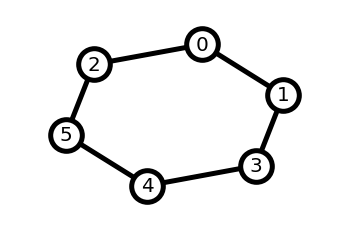

In [22]:
G = graph_data[0][1]
print(G.adj)

options = {
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

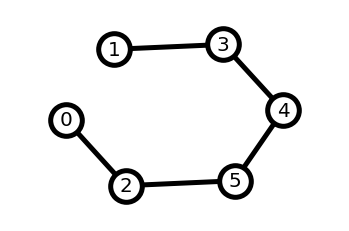

In [24]:
p = nx.spring_layout(G)
all_tree = find_all_spanning_trees(G)

tree = all_tree[0]
nx.draw_networkx(tree, pos=p, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

    

In [25]:
print(len(tree))

6
